In [1]:
import pandas as pd
from Phase3.kmeans import KMeans
from Phase3.enhanced_search import EnhancedSearch

Read The Data

In [2]:
df = pd.read_excel('../data/IR00_3_11k News.xlsx')
df_content = df['content']
df_title = df['url']
df_labels = df['topic'].copy()
df_labels.loc[df_labels == 'sports'] = 'sport'
df_labels.loc[df_labels == 'political'] = 'politics'

es = EnhancedSearch(title=df_title, content=df_content, labels=df_labels, volume_of_data='11k')

# Preparing The Models

In [3]:
%%time

es.load_documents_tfidf_scores()
es.prepare_word_embedding_model()
es.construct_document_vectors()
es.label_encoding()


Wall time: 8.78 s


array([4, 4, 4, ..., 0, 0, 0])

In [ ]:
%%time
es.clustering_model = KMeans()
df = pd.DataFrame(list(es.all_docs_embedding.values()))
es.clustering_model.plot_k_means_error(df, min_k=3, max_k=7)

(3, 300)
Error Rate For K = 3 : 369.5147699541942
Error RSS For K = 3 : 2070553.7438895165
(4, 300)
Error Rate For K = 4 : 1355.8571292960264
Error RSS For K = 4 : 1957947.6424129622
(5, 300)


In [4]:
%%time
es.calculate_clusters(k=5, min_initial_centroids_dist=10)

(5, 300)
Wall time: 5min 55s


# Queries

## Queries With Clustering

In [6]:
%%time
res = es.enhanced_query_with_clustering('استقلال', k=5)

Clusters Loaded in 0.5349979400634766 Seconds.
Centroids Loaded 0.5359976291656494 Seconds
Query Vector constructed 1.1149969100952148 Seconds.
{1: 0.7387845221083527, 4: 0.5534284263328049, 2: 0.5489669391037238, 0: 0.4775327602443297, 3: 0.4744542520864845}
1753
Query Processed in 70.93025398254395 Seconds.
Wall time: 1min 10s


In [7]:
es.vectorizer.print_k_results(res, 5, 'استقلال')

Doc ID: 732, Doc Title: https://www.farsnews.ir/news/14000723000548/یامگا-هم-تیمی-های-ایرانی-ام-از-استقلال-خیلی-تعریف-کردند-به-بزرگترین, Similarity: 0.9408784026591388
استقلال باشگاهی بسیار بزرگ است و بازیکنان ایرانی هم تیمی من در سالهای گذشته خیلی مسائل [خوبی](https://search.farsnews.ir/?q=خوبی&o=on) را از این تیم به من گفتند.
----------------------------------------------------------------------------------------------------
وی افزود: افتخار می کنم در استقلال حضور دارم.
----------------------------------------------------------------------------------------------------
یامگا با تاکید بر اینکه استقلال بزرگترین باشگاه ایران وحتی آسیا است گفت: هدف من بردن است.
----------------------------------------------------------------------------------------------------
می دانم برای چه کاری به استقلال آمده ام.
----------------------------------------------------------------------------------------------------
امیدوارم بتوانیم قهرمانی را برای استقلال به دست بیاوریم.
--------------------------------

In [9]:
%%time
res = es.enhanced_query_with_clustering('ژیمناستیک', k=5)
es.vectorizer.print_k_results(res, 5, 'ژیمناستیک')

Clusters Loaded in 0.0 Seconds.
Centroids Loaded 0.0 Seconds
Query Vector constructed 0.0 Seconds.
{2: 0.6185364828415926, 3: 0.5634446072935267, 0: 0.5466380563172168, 4: 0.5117091055348444, 1: 0.4789832314067809}
2728
Query Processed in 361.81820249557495 Seconds.
Doc ID: 1367, Doc Title: https://www.farsnews.ir/news/14000714000231/هشدار-هیات-ژیمناستیک-تهران-در-خصوص-سالن‌های-مختلط-و-اقدامات-غیراخلاقی, Similarity: 0.8788794640001586
به گزارش خبرگزاری فارس، رضا شاکرمی در خصوص انتشار خبری مبنی بر فعالیت سالن مختلط ژیمناستیک در یکی از مناطق جنوب شهر تهران اظهار داشت: متاسفانه ما هم متوجه شدیم که این مسئله واقعیت دارد و به پیگیری این موضوع [به صورت](https://search.farsnews.ir/?q=به صورت&o=on) جدی پرداخته‌ایم.
----------------------------------------------------------------------------------------------------
این سالن ژیمناستیک تحت اجاره فردی خاص است و متاسفانه خودش ژیمناست‌های دختر را تمرین می‌دهد؛ وی عنوان کرده که سالن را اجاره داده است اما واقعیت این است که این فرد خودش سالن را اجاره کر

In [4]:
%%time
res = es.enhanced_query_with_clustering('سازمان ملل متحد', k=5)
es.vectorizer.print_k_results(res, 5, 'سازمان ملل متحد')

Clusters Loaded in 0.8579957485198975 Seconds.
Centroids Loaded 0.030999183654785156 Seconds
Query Vector constructed 0.362001895904541 Seconds.
{3: 0.6144350032428612, 0: 0.5674828028548011, 2: 0.5443925069830585, 1: 0.5436514372080113, 4: 0.537993173345161}
1497
Query Processed in 124.47768115997314 Seconds.
Doc ID: 2008, Doc Title: https://www.isna.ir/news/99053022917/اعلام-رسمی-آمریکا-برای-فعال-سازی-مکانیسم-ماشه-طرف-های-برجام, Similarity: 0.8270642421878788
به گزارش ایسنا، رویترز گزارش داد که آمریکا نامه‌ای را به ۱۵ عضو شورای امنیت سازمان ملل متحد ارائه کرده که طی آن جمهوری اسلامی ایران به عدم پایبندی به برجام متهم شده است.
----------------------------------------------------------------------------------------------------
در همین حال، مایک پمپئو وزیر خارجه آمریکا پنجشنبه شب با حضور در مقر سازمان ملل در نیویورک، درخواست فعال کردن مکانیسم ماشه را به رئیس دوره‌ای شورای امنیت این سازمان ارائه کرده است.
-----------------------------------------------------------------------------------

In [3]:
%%time
res = es.enhanced_query_with_clustering('استقلال', k=50, b=3)

Wall time: 0 ns
{26: 0.8149376504995696, 40: 0.7905351227077648, 22: 0.7615905901740749, 44: 0.7515417587326076, 19: 0.7088299684409501, 20: 0.6623422948686117, 33: 0.6470968704799492, 49: 0.6470084630822512, 28: 0.6308394830644045, 0: 0.6295634649858833, 39: 0.6293889525085437, 38: 0.6160521745182239, 1: 0.6105609605065287, 31: 0.5911240307547411, 32: 0.5848994527843163, 36: 0.5841708186763639, 4: 0.578511518900449, 15: 0.5754310200571613, 24: 0.5655232374441432, 13: 0.5599798943309225, 34: 0.5534855662139332, 41: 0.5509434919130286, 18: 0.5481046225106051, 5: 0.5453312416458712, 43: 0.5451296990244301, 45: 0.5427110791375283, 23: 0.5411412720669323, 2: 0.5382326327683997, 3: 0.5381738101943904, 30: 0.5335771871035344, 46: 0.5326901938119628, 16: 0.5316348909625008, 11: 0.5304286672417786, 42: 0.5300764118734761, 7: 0.5291246535382903, 17: 0.5264666581640159, 10: 0.5257901808976402, 21: 0.5199358113233135, 25: 0.5175094635852382, 37: 0.516008894781572, 47: 0.5149290689953883, 14: 0.51

In [4]:
es.vectorizer.print_k_results(res, 5, 'استقلال')

Doc ID: 33734, Doc Title: https://www.farsnews.ir/news/13991221000754/واکنش-مجیدی-به-کنار-گذاشتن-دانشگر-بازیکن-سالاری-در-استقلال-جایی-ندارد, Similarity: 0.9423973665554044
به گزارش خبرگزاری فارس، [فرهاد مجیدی](https://search.farsnews.ir/?q=فرهاد مجیدی&o=on) در گفت‌وگو با سایت [باشگاه استقلال](https://www.farsnews.ir/special/باشگاه استقلال)،ضمن تبریک به هواداران در خصوص دو پیروزی اخیر این تیم در لیگ برتر و جام حذفی گفت: من آمده‌ام تا استقلال را با پشتوانه شما هواداران بسازم.
----------------------------------------------------------------------------------------------------
حتی اگر در زمین مسابقه شکست بخوریم، اجازه نمی‌دهیم اخلاق، عزت و اعتبار باشگاه بزرگ استقلال خدشه دار شود.
----------------------------------------------------------------------------------------------------
وی افزود: از همین تریبون به همه بازیکنان استقلال تاکید می‌کنم که حرمت این پیراهن مقدس را نگه دارند و اصول اخلاقی و شخصیت باشگاه را همواره مد نظر قرار دهند.
----------------------------------------------------------

## Queries Without Clustering


In [10]:
es.vectorizer.load_all_docs_vec('DocumentEmbeddings/document_vectors_50k.obj')
es.vectorizer.read_positional_index('Indexes/tfidf_index_50k.json')
es.vectorizer.construct_champion_list(10)

{'گزار': {'23519': 1.1023900393900956,
  '9847': 0.8715062033470474,
  '47727': 0.8420148731772745,
  '41091': 0.8355289993890076,
  '23419': 0.8288155051649991,
  '6733': 0.8146375419056291,
  '22050': 0.8071340329856974,
  '23147': 0.7993241749952259,
  '2704': 0.7911818843343644,
  '10009': 0.7911818843343644},
 'ایسنا': {'9847': 7.3444975654666,
  '10034': 6.958329267480977,
  '2704': 6.374497072221288,
  '10009': 6.374497072221288,
  '2714': 6.1460654615333,
  '10843': 5.670232112657607,
  '9705': 5.294463138701308,
  '10082': 5.294463138701308,
  '10856': 5.294463138701308,
  '6273': 5.145954667072808},
 '،': {'40289': 0.1328041656978383,
  '25255': 0.1313896648841647,
  '7340': 0.1284183919443981,
  '44624': 0.128362813987269,
  '9868': 0.12727438455162587,
  '43264': 0.12727438455162587,
  '40831': 0.12561060257952175,
  '40724': 0.12554606349459527,
  '11174': 0.12535110708875982,
  '2487': 0.12495502667393392},
 'استعفا': {'47870': 20.434403087252694,
  '48593': 18.4558727393

In [7]:
%%time

res = es.vectorizer.test_w2v_model('استقلال')
es.vectorizer.print_k_results(res, 5, 'استقلال')

Doc ID: 34094, Doc Title: https://www.farsnews.ir/news/13991218000424/نظری-شرط-خاص-و-ویژه-ای-برای-مجیدی-نگذاشتیم-مشکل-استقلال-هم-برای-باز, Similarity: 0.8504941660653011
امیدوارم مجیدی و کادر فنی جدید استقلال با تلاش‌های بی وقفه خیلی زود [استقلال](https://www.farsnews.ir/special/باشگاه استقلال) را به جایگاه واقعی‌اش برسانند و به دغدغه هواداران جامه عمل بپوشانند.
----------------------------------------------------------------------------------------------------
وی در خصوص اینکه آیا استقلال قرار است استقلال فقط قاسمی نژاد را جذب کند گفت: ما با چند بازیکن صحبت کردیم اما در نهایت بر اساس نظر کادر فنی عملا تنها امکان این را داریم که از امین قاسمی نژاد استفاده کنیم.
----------------------------------------------------------------------------------------------------
سخنگوی باشگاه استقلال در خصوص بسته بودن پنجره نقل و انتقالات این باشگاه گفت: ما چند وقت پیش با دشواری پنجره باشگاه را باز کردیم ولی خیلی راحت این زحمات به هدر رفت.
-----------------------------------------------------------------

In [8]:
%%time

res = es.vectorizer.test_w2v_model('ژیمناستیک')
es.vectorizer.print_k_results(res, 5, 'ژیمناستیک')

Doc ID: 36118, Doc Title: https://www.farsnews.ir/news/13991202000288/آخرین-خبرها-از-پروسه-تایید-لباس-بانوان-ژیمناست, Similarity: 0.8685761939763723
به گزارش خبرگزاری فارس، طبق اعلام روابط عمومی فدراسیون ژیمناستیک، [وزارت ورزش و جوانان](https://www.farsnews.ir/special/وزارت ورزش و جوانان) اعلام کرد لباس بانوان ژیمناست ایران باید سه ماه قبل از حضور در میادین بین‌المللی آکروباتیک ژیمناستیک مورد تایید کارشناسان این وزراتخانه قرار بگیرد.
----------------------------------------------------------------------------------------------------
آذر سال ۹۸ بود که پس از رایزنی‌های فراوان زهرا اینچه درگاهی با رئیس کمیته آکروژیم فدراسیون جهانی ژیمناستیک، مجوز حضور بانوان کشورمان با حجاب اسلامی در مسابقات بین‌المللی آکروباتیک ژیمناستیک صادر شد.
----------------------------------------------------------------------------------------------------
در ادامه و پس برگزاری جلسات مختلف با مسئولان وزارت ورزش، مهین فرهای‌زاد، معاون امور بانوان وزارت ورزش و جوانان در نامه‌ای به زهرا اینچه‌درگاهی، رییس فدراسیون ژیم

In [11]:
%%time

res = es.vectorizer.test_w2v_model('سازمان ملل متحد')
es.vectorizer.print_k_results(res, 5, 'سازمان ملل متحد')

Doc ID: 25995, Doc Title: https://www.farsnews.ir/news/13991020000042/اولین-سازمان-ملل-جهان-که-بی‌خاصیت-بود-و-منحل-شد, Similarity: 0.8541958353289277
**همین دیروز| گروه تاریخ خبرگزاری فارس ـ امین رحیمی:** پس از جنگ جهانی اول که کشورهای اروپایی بر سر منافع‌شان درگیر شدند و جهان را به آتش کشیدند و ۱۸ میلیون نفر براثر اقدامات نظامی کشته شدند، کشورهای جهان به این نتیجه رسیدند که یک سازمان بین‌المللی تأسیس کنند که جلوی جنگ‌هایی با این عظمت گرفته شود.
----------------------------------------------------------------------------------------------------
یکی از اتفاقات عجیب «جامعه ملل» این‌که شوروی که بعدها به این سازمان پیوسته بود به شیوه‌ای غیرقانونی و کاملا متضاد با قوانین بنیادی «جامعه ملل» و بدون رأی اکثریت(با رأی اقلیت) اخراج شد.
----------------------------------------------------------------------------------------------------
**جامعه ملل بریتانیا!**
----------------------------------------------------------------------------------------------------
به‌تدریج بسیاری از کشورها که دیدند این

In [2]:
df = pd.read_excel('Classification/50k/classification_res_50k_5.xlsx')
df_content = df['content']
df_title = df['url']
df_labels = df['category'].copy()
df_labels.loc[df_labels == 'sports'] = 'sport'
df_labels.loc[df_labels == 'political'] = 'politics'

es = EnhancedSearch(title=df_title, content=df_content, labels=df_labels, volume_of_data='7k')

es.load_documents_tfidf_scores()
es.prepare_word_embedding_model()
es.construct_document_vectors()
es.label_encoding()

array([4, 4, 0, ..., 0, 0, 0])

## Evaluating The KNN Model

Loaded.
Accuracy: 0.9220607661822986, f1_score: 0.3386704558081276
----------------------------------------------------------------------------------------------------
Accuracy: 0.9313077939233818, f1_score: 0.3299694518571565
----------------------------------------------------------------------------------------------------
Accuracy: 0.8928571428571429, f1_score: 0.5100918080006747
----------------------------------------------------------------------------------------------------
Accuracy: 0.8333333333333334, f1_score: 0.4899915618895589
----------------------------------------------------------------------------------------------------
Accuracy: 0.8809523809523809, f1_score: 0.5996246514949993
----------------------------------------------------------------------------------------------------
Accuracy: 0.9034391534391535, f1_score: 0.6396301159799643
----------------------------------------------------------------------------------------------------
Accuracy: 0.6917989417989417, f1

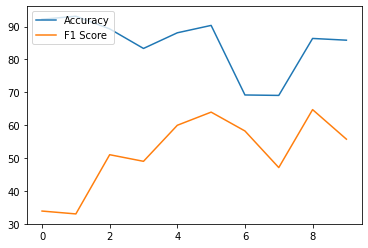

In [4]:
es.evaluate_classifier(k=5)

Loaded.
Accuracy: 0.9233817701453104, f1_score: 0.3043367311886212
----------------------------------------------------------------------------------------------------
Accuracy: 0.9365918097754293, f1_score: 0.3363478863478864
----------------------------------------------------------------------------------------------------
Accuracy: 0.8968253968253969, f1_score: 0.5293080537884454
----------------------------------------------------------------------------------------------------
Accuracy: 0.8227513227513228, f1_score: 0.49063512546492427
----------------------------------------------------------------------------------------------------
Accuracy: 0.8875661375661376, f1_score: 0.6002129224306548
----------------------------------------------------------------------------------------------------
Accuracy: 0.9074074074074074, f1_score: 0.6494532281401095
----------------------------------------------------------------------------------------------------
Accuracy: 0.6732804232804233, f

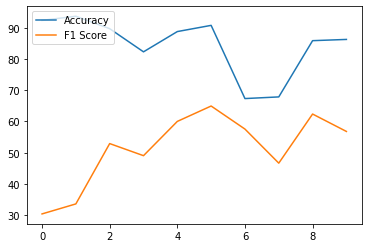

In [5]:
es.evaluate_classifier(k=7)

Loaded.
Accuracy: 0.9273447820343461, f1_score: 0.3283240833209213
----------------------------------------------------------------------------------------------------
Accuracy: 0.9352708058124174, f1_score: 0.33158633897223105
----------------------------------------------------------------------------------------------------
Accuracy: 0.9021164021164021, f1_score: 0.5338191031699078
----------------------------------------------------------------------------------------------------
Accuracy: 0.8187830687830688, f1_score: 0.4851379079793734
----------------------------------------------------------------------------------------------------
Accuracy: 0.8862433862433863, f1_score: 0.5980358797011902
----------------------------------------------------------------------------------------------------
Accuracy: 0.9074074074074074, f1_score: 0.6206372637263726
----------------------------------------------------------------------------------------------------
Accuracy: 0.6296296296296297, f

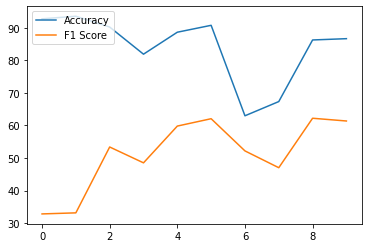

In [6]:
es.evaluate_classifier(k=11)

## Queries With Classification

In [3]:
%%time

query = 'cat:sport استقلال'
res = es.enhanced_query_with_classification(query)
es.vectorizer.print_k_results(res, 5, 'استقلال')

Required Files Loaded in 0.0 Seconds.
sport استقلال
2386 docs in the category of sport
Query Vector constructed 0.31999850273132324 Seconds.
Query Processed in 19.709035396575928 Seconds.
Doc ID: 732, Doc Title: https://www.farsnews.ir/news/14000723000548/یامگا-هم-تیمی-های-ایرانی-ام-از-استقلال-خیلی-تعریف-کردند-به-بزرگترین, Similarity: 0.9408784026591388
استقلال باشگاهی بسیار بزرگ است و بازیکنان ایرانی هم تیمی من در سالهای گذشته خیلی مسائل [خوبی](https://search.farsnews.ir/?q=خوبی&o=on) را از این تیم به من گفتند.
----------------------------------------------------------------------------------------------------
وی افزود: افتخار می کنم در استقلال حضور دارم.
----------------------------------------------------------------------------------------------------
یامگا با تاکید بر اینکه استقلال بزرگترین باشگاه ایران وحتی آسیا است گفت: هدف من بردن است.
----------------------------------------------------------------------------------------------------
می دانم برای چه کاری به استقلال آمده ام.
--

In [4]:
%%time

query = 'cat:economy طلا'
res = es.enhanced_query_with_classification(query)
es.vectorizer.print_k_results(res, 5, 'طلا')

Required Files Loaded in 0.0 Seconds.
economy طلا
611 docs in the category of economy
Query Vector constructed 0.0039980411529541016 Seconds.
Query Processed in 9.328001260757446 Seconds.
Doc ID: 5263, Doc Title: https://www.isna.ir/news/1400070200768/افت-و-خیز-محدود-قیمت-سکه-و-طلا-نوسان-۱۰-درصد-حباب-سکه, Similarity: 0.7215826899448812
براساس اطلاعاتی که از سوی اتحادیه طلا و جواهر تهران در اختیار ایسنا، قرار گرفت، آرامش نسبی بازارهای جهانی در کنار نوسانات محدود بازار ارز، سبب شد قیمت طلا و سکه در بازار سکه و طلای داخلی در یک هفته اخیر با حداقل نوسان توام گردد.
----------------------------------------------------------------------------------------------------
قیمت هر اونس جهانی طلا در بازار جهانی طلا که تا چند هفته گذشته تا ۱۸۰۰ دلار هم بالا رفته بود، ابتدای هفته منتهی ۲۶ شهریور ماه، با افت ۲۵ دلاری هفته را آغاز کرد و همین عامل سبب آرامش بازار شد؛ تا جاییکه در طول این هفته‌ای که‌ گذشت، هر اونس طلا روند قیمتی خنثایی رو از خود بروز داد و قیمت هر اونس جهانی طلا در معاملات این هفته به کف پ

In [5]:
%%time

query = 'cat:politics سازمان ملل متحد'
res = es.enhanced_query_with_classification(query)
es.vectorizer.print_k_results(res, 5, 'سازمان ملل متحد')

Required Files Loaded in 0.0 Seconds.
politics سازمان ملل متحد
2447 docs in the category of politics
Query Vector constructed 0.002998828887939453 Seconds.
Query Processed in 39.66705513000488 Seconds.
Doc ID: 2689, Doc Title: https://www.farsnews.ir/news/14000703000380/نوروزی-در-سال-قبل-دلمان-برای-سخنرانی‌های-انقلابی-رئیس-جمهور-در, Similarity: 0.8323337673665838
حجت الاسلام حسن نوروزی نماینده مردم رباط کریم در [مجلس شورای اسلامی](https://www.farsnews.ir/special/مجلس شورای اسلامی) در گفت‌وگو با خبرنگار پارلمانی خبرگزاری فارس، با تمجید از مواضع و سخنرانی رئیس جمهور کشورمان در مجمع عمومی سازمان ملل گفت: 8 سال بود که دلمان برای سخنرانی انقلابی رئیس جمهور کشورمان در اجلاس سالیانه مجمع عمومی سازمان ملل تنگ شده بود و امسال شاهد این سخنرانی انقلابی بودیم.
----------------------------------------------------------------------------------------------------
وی افزود: مواضع و صحبت‌های آقای رئیسی در هفتصد و ششمین مجمع عمومی سازمان ملل همان چیزی بود که مورد انتظارمان بود و تحقق یافت.
--------------

In [6]:
%%time

query = 'cat:culture کتاب'
res = es.enhanced_query_with_classification(query)
es.vectorizer.print_k_results(res, 5, 'کتاب')

Required Files Loaded in 0.0 Seconds.
culture کتاب
1506 docs in the category of culture
Query Vector constructed 0.006002902984619141 Seconds.
Query Processed in 32.73903155326843 Seconds.
Doc ID: 7481, Doc Title: https://www.isna.ir/news/1400071711351/انتشار-خاطرات-ابراهیم-گلستان-از-ملی-شدن-نفت, Similarity: 0.9379458307606854
به گزارش ایسنا، این کتاب در ۱۴۱ صفحه و با قیمت ۴۵ هزار تومان در نشر بازتاب‌نگار منتشر شده است.
----------------------------------------------------------------------------------------------------
در معرفی «کاغذ» از این کتاب می‌خوانیم: "این کتاب خاطرات ابراهیم گلستان از دوران ملی شدن (یا به قول خودش «ملی کردن») صنعت نفت است.
----------------------------------------------------------------------------------------------------
او در این دوران کارمند شرکت نفت در آبادان بوده و مطالب این کتاب هم در همین شهر می‌گذرد.
----------------------------------------------------------------------------------------------------
گلستان در مقدمه تازه‌ای که - به‌تاریخ مرداد ۱۴۰۰ - بر ک

In [7]:
%%time

query = 'cat:health واکسن آسترازنکا'
res = es.enhanced_query_with_classification(query)
es.vectorizer.print_k_results(res, 5, 'واکسن آسترازنکا')

Required Files Loaded in 0.0 Seconds.
health واکسن آسترازنکا
612 docs in the category of health
Query Vector constructed 0.002998828887939453 Seconds.
Query Processed in 12.226999282836914 Seconds.
Doc ID: 5857, Doc Title: https://www.isna.ir/news/1400052014418/واکسن-های-کرونا-با-چه-داروهایی-تداخل-دارند, Similarity: 0.8628851064297078
اولا باید گفت که توصیه می شود برای حفظ اثربخشی واکسن ها، حداقل فاصله زمانی ۱۴ روز بین تزریق واکسن کووید-۱۹ و سایر واکسن ها رعایت شود.
----------------------------------------------------------------------------------------------------
در عین‌حال باید توجه کرد که اغلب داروها هیچ تداخلی با واکسن های کووید-۱۹ ندارد.
----------------------------------------------------------------------------------------------------
در برخی موارد خاص و به ندرت، با مشورت و صلاحدید پزشک معالج، ممکن است نیاز باشد فاصله زمانی بین تزریق واکسن و برخی داروهای سرکوب کننده سیستم ایمنی وجود داشته باشد.
------------------------------------------------------------------------------------

## Queries Without Classification


In [43]:
# import json
# with open('Indexes/positional_index_7k.json') as json_file:
#     positional_index = json.load(json_file)
# es.vectorizer.calculate_all_docs_tfidf(positional_index=positional_index)
# es.vectorizer.save_positional_index('Indexes/tfidf_index_7k.json')

es.vectorizer.load_all_docs_vec('DocumentEmbeddings/document_vectors_7k.obj')
es.vectorizer.read_champion_list('A:\PYTHON\InformationRetrieval\Phase2\champion_list.json')
es.vectorizer.model = es.vectorizer.load_w2v_model('A:\PYTHON\InformationRetrieval\Phase2\w2v_300d.h5')

In [44]:
%%time

res = es.vectorizer.test_w2v_model('استقلال')
es.vectorizer.print_k_results(res, 5, 'استقلال')

Doc ID: 255, Doc Title: https://www.farsnews.ir/news/14000730000177/اکبرپور-گرفتن-3-امتیاز-در-بازی-اول-مهم-است-ذوب-آهن-چون-فوتبال-بازی-می, Similarity: 0.762322140732804
علیرضا اکبرپور در گفت و گو با خبرنگار ورزشی خبرگزاری فارس، در خصوص عملکرد تیم استقلال در دیدار با هوادار اظهار داشت: بازی های اول در لیگ همیشه سخت است، به خصوص وقتی یک تیم از لیگ پایین تر به لیگ برتر صعود کرده باشد.
----------------------------------------------------------------------------------------------------
وی افزود: دو تیم شناخت آنچنانی از یکدیگر نداشتند و با این وجود همین که استقلال در بازی اول 3 امتیاز بازی را گرفت بهترین اتفاق ممکن برای این تیم بود.
----------------------------------------------------------------------------------------------------
مطمئنا شرایط استقلال رفته رفته بهتر خواهد شد.
----------------------------------------------------------------------------------------------------
مهاجم سابق استقلال با اشاره به این موضوع که بازیکنان جدید نیاز به هماهنگی دارند گفت: استقلال از مدیریت تا بازیکن و حت

In [45]:
%%time

res = es.vectorizer.test_w2v_model('طلا')
es.vectorizer.print_k_results(res, 5, 'طلا')

Doc ID: 476, Doc Title: https://www.farsnews.ir/news/14000727000305/مشتاقی-ارزش-طلای-یوسفی-از-کل-تیم-بیشتر-است-۴-طلای-فرنگی-بی‌سابقه-بود, Similarity: 0.7589239912483856
به گزارش خبرنگار ورزشی خبرگزاری فارس، [بهرام مشتاقی](https://search.farsnews.ir/?q=بهرام مشتاقی&o=on) درباره نتایج کشتی فرنگی در مسابقات جهانی نروژ، عنوان کرد: نمی‌خواهم ارزش این کار را کم کنم اما بعد از المپیک همیشه بچه‌ها درخشیده اند، سال ۶۵ در بازی‌های یوکوهاما ۵ طلا گرفتیم، سال ۶۱ منچستر با ۳ طلا قهرمان شدیم و الان هم با ۳ طلا نایب قهرمان‌.
----------------------------------------------------------------------------------------------------
وی درباره کسب مدال طلای سنگین‌وزن برای نخستین بار، تصریح کرد: در سنگین وزن در مسابقات جهانی و المپیک مدال طلا نداشتیم، فقط بشیر باباجان زاده مدال آورده بود.
----------------------------------------------------------------------------------------------------
او با چند مدال برنز جهان استحقاق طلا دارد، امیدوارم این نقیصه حل شود.
-------------------------------------------------------

In [46]:
%%time

res = es.vectorizer.test_w2v_model('سازمان ملل متحد')
es.vectorizer.print_k_results(res, 5, 'سازمان ملل متحد')

Doc ID: 2689, Doc Title: https://www.farsnews.ir/news/14000703000380/نوروزی-در-سال-قبل-دلمان-برای-سخنرانی‌های-انقلابی-رئیس-جمهور-در, Similarity: 0.7256387711111889
حجت الاسلام حسن نوروزی نماینده مردم رباط کریم در [مجلس شورای اسلامی](https://www.farsnews.ir/special/مجلس شورای اسلامی) در گفت‌وگو با خبرنگار پارلمانی خبرگزاری فارس، با تمجید از مواضع و سخنرانی رئیس جمهور کشورمان در مجمع عمومی سازمان ملل گفت: 8 سال بود که دلمان برای سخنرانی انقلابی رئیس جمهور کشورمان در اجلاس سالیانه مجمع عمومی سازمان ملل تنگ شده بود و امسال شاهد این سخنرانی انقلابی بودیم.
----------------------------------------------------------------------------------------------------
وی افزود: مواضع و صحبت‌های آقای رئیسی در هفتصد و ششمین مجمع عمومی سازمان ملل همان چیزی بود که مورد انتظارمان بود و تحقق یافت.
----------------------------------------------------------------------------------------------------
عضو فراکسیون روحانیت مجلس اظهار داشت: آقای رئیسی در مجمع عمومی سازمان ملل بحث حمایت از ملل مظلوم منطقه و همچنین بحث

In [47]:
%%time

res = es.vectorizer.test_w2v_model('کتاب')
es.vectorizer.print_k_results(res, 5, 'کتاب')

Doc ID: 6737, Doc Title: https://www.isna.ir/news/1400033023131/آغاز-انتشار-مجموعه-یک-فیلم-یک-جهان, Similarity: 0.7599794054175042
بعضی کتاب‌های این مجموعه را می‌شود قبل از دیدن فیلم خواند، بعد فیلم را دید و دوباره برگشت و کتاب را بازخوانی کرد، که اتفاقاً تجربه‌ جالبی هم از کار درمی‌آید.
----------------------------------------------------------------------------------------------------
اما بعضی کتاب‌ها را بهتر است بعد از دیدن یا بازدیدن فیلم خواند، چون متکی‌اند به جزئیات و نیاز است مخاطب به‌خوبی آن‌ها را در ذهنش داشته باشد تا بتواند روند کتاب را در بهترین حالت پی بگیرد.
----------------------------------------------------------------------------------------------------
در کل، قدیمی‌بودن یا جدیدبودن فیلم چندان تعیین‌کننده نیست، بلکه خودِ کتاب و نویسنده‌اش و البته جایگاه فیلم در تاریخ سینماست که نقشه‌ راه ماست.
----------------------------------------------------------------------------------------------------
کریمی درباره معیار انتخاب کتاب‌ها نیز اظهار کرد: یکی از وقت‌گیرترین بخش‌های ک

In [48]:
%%time

res = es.vectorizer.test_w2v_model('واکسن آسترازنکا')
es.vectorizer.print_k_results(res, 5, 'واکسن آسترازنکا')

Doc ID: 5685, Doc Title: https://www.isna.ir/news/1400032922047/مهم-ترین-سلاح-مبارزه-با-کرونا, Similarity: 0.745298496763413
سهیل افرازی با بیان اینکه ایمنی‌زایی واکسن‌ها حدود ۲ تا ۳ هفته بعد از تزریق نوبت دوم واکسن کامل می‌شود، عنوان کرد: لازم است تا آن زمان فرد به شکل دقیق پروتکل‌های بهداشت فردی را رعایت کند.
----------------------------------------------------------------------------------------------------
**افرازی ادامه داد: انواع واکسن‌های تجاری کووید -۱۹ غیرقابل تعویض است و فرد بعد از دریافت نوبت اول واکسن حتماً باید از همان نوع واکسن در نوبت دوم استفاده نماید.
----------------------------------------------------------------------------------------------------
فاصله دوز اول و دوم واکسن در برندهای مختلف متفاوت است که در مورد واکسن‌های اسپوتنیک (فاصله بین دو نوبت ۲۸ روز است که در شرایط خاص امکان فاصله‌گذاری بین ۲۱ تا ۹۰ روز هم امکان‌پذیر است.)، کووکسین و سینوفارم ۲۸ روز و برای واکسن آسترازنکا ۱۲ هفته است.**
--------------------------------------------------------------------------